# Curves
****
![Curve](curve.gif)

The Curves that are to be covered :
1. **Bézier Curve**
2. **B-Spline Curve**

Curves are of various types and these are : 
![Types-Of-Curves](types-of-curves.png)

The curves we are going to study here are ***Approximation Curve***.


In [1]:
import numpy as np
from scipy.special import comb
from scipy import interpolate
from matplotlib import pyplot as plt
%matplotlib notebook

## Bézier Curve
****
![Bezier](bezier.gif)

> Bézier Curve is a *Spline Approximation Curve* which was designed by **Pierre Bézier**.
<br>
> It was Created in *1960's* to Design *Renault Cars*

Properties of Bézier Curve inlude:
- It is a **Parametric Curve** which has a parameter $u$ in range $0\leq u \leq 1$ .
- We have **$n$ degree polynomial** for **$n+1$ control points**.
- It uses ***Bernstein Polynomial*** for drawing the Curve.
- It's General Application is very easy.
- This curve has **Global Control**

$$
\textbf{Bézier Curve Equation} \\ \\
\begin{equation*}
Q(u) = \sum_{i=0}^n P_{i} \cdot B_{i,n}(u) \\ \\
B_{i,n}(u) = \binom{n}{i} \cdot u^i \cdot (1-u)^{n-i} \\ \\
\binom{n}{i} = \frac{n!}{(n-1)! \cdot i!} \\ \\
\end{equation*}
where, \\
P_{i} = Control \space Point \\
B_{i,n} = Bernstein \space Polynomial \\
n = Degree \space of \space Polynomial \\
u = Parameter \space 0\leq u\leq1
$$


In [2]:
def bernstein_poly(i, n, u):
    """
     The Bernstein polynomial of n, i as a function of u
    """

    return comb(n, i) * ( u**i ) * (1 - u)**(n-i)


def bezier_curve(points, nTimes=1000):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals

def plot_bezier(points):
    print(points)
    xpoints = [p[0] for p in points]
    ypoints = [p[1] for p in points]

    xvals, yvals = bezier_curve(points, nTimes=1000)
    plt.plot(xpoints,ypoints,'k--',label='Control polygon',marker='o',markerfacecolor='red')
    plt.plot(xvals, yvals,'b',linewidth=2.0,label='Bezier curve',color="green")
    plt.legend(loc='best')
    plt.axis([min(xpoints)-1, max(xpoints)+1, min(ypoints)-1, max(ypoints)+1])
    plt.title('Bezier Curves')
    plt.grid()
    plt.show()

Enter the Control Points : 3
Enter the points : 4,2,8,8,16,4
[[ 4.  2.]
 [ 8.  8.]
 [16.  4.]]


<IPython.core.display.Javascript object>


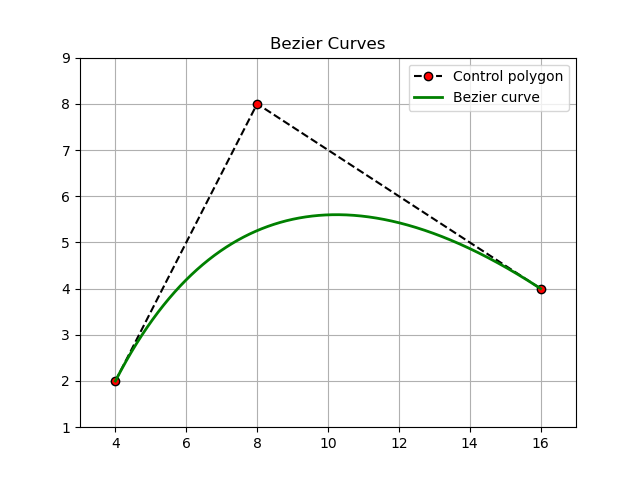

In [3]:
controlPoints = int(input("Enter the Control Points : "))
points = np.array([float(_) for _ in input("Enter the points : ").split(",")]).reshape(controlPoints,2)
plot_bezier(points)

## B-Spline Curve
****
![bspline](bspline.png)
> B-Spline or **Basis Spline** is also a type of Spline Approximation Curve.

Properties of B-Spline Curve are : 
- This curve is made of $n+1$ control points and order of the curve is $k$.
- $k$ has to be taken by the user.
- It uses polynomial of degree $k-1$, where $k > 2$.
![bspline-curve](bspline-curve.png)
- It's parameter ranges from $0\leq u \leq S$
- This curve is used to draw both open and Close Curve.
- It has local control over the curve.

$$
\textbf{B-Spline Curve Equation} \\ \\
\begin{equation*}
P(u) = \sum_{i=0}^n P_{i} \cdot N_{i,k}(u) \\ \\
N_{i,k}(u) = \frac{(u-t_{i}) \cdot N_{i,k-1}(u)}{t_{i+k-1} - t_{i}} + \frac{(t_{i+k}-u) \cdot N_{i+1,k-1}(u)}{t_{i+k} - t_{i+!}} \\ \\
t_{i} = \begin{cases}
0 &\text{if $i<k$} \\
i-k+1 &\text{if $k\leq i \leq n$}\\
n-k+2 &\text{if $i > n$}
\end{cases} \\
N_{i,k}(u) = \begin{cases}
1 &\text{if $t_{i} \leq u \leq t_{i+1}$} \\
0 &\text{otherwise}
\end{cases}
\end{equation*} \\ \\ 
where,\\
P_{i} = Control \space Point \\
N_{i,k}(u) = Recursive \space function \\
k = Order of Curve \\
u = Parameter \space 0\leq u\leq (n-k+2) \\
$$


In [4]:
def plot_bspline(points, closed = False):
    x=points[:,0]
    y=points[:,1]
    
    if(closed):
        x=np.append(x,[x[0]])  
        y=np.append(y,[y[0]])

    l=len(x)  

    t=np.linspace(0,1,l-2,endpoint=True)
    t=np.append([0,0,0],t)
    t=np.append(t,[1,1,1])

    tck=[t,[x,y],3]
    u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)
    out = interpolate.splev(u3,tck)

    plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
    #plt.plot(x,y,'ro',label='Control points only')
    plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
    plt.legend(loc='best')
    plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
    plt.title('B-Spline Curves')
    plt.grid()
    plt.show()


Enter the Control Points : 9
Enter the points : 3,1,2.5,4,0,1,-2.5,4,-3,0,-2.5,-4,0,-1,2.5,-4,3,-1


<IPython.core.display.Javascript object>


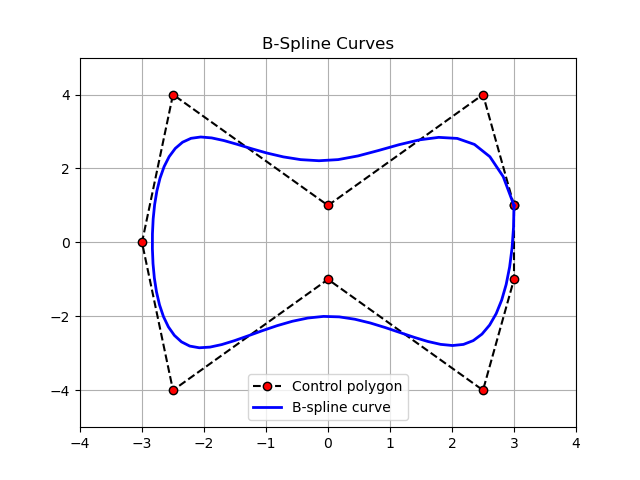

In [12]:
controlPoints = int(input("Enter the Control Points : "))
points = np.array([float(_) for _ in input("Enter the points : ").split(",")]).reshape(controlPoints,2)
plot_bspline(points, True)

Some examples for Demo : 
- 9 Points : 3,1,2.5,4,0,1,-2.5,4,-3,0,-2.5,-4,0,-1,2.5,-4,3,-1
- 3 Points : 4,2,8,8,16,4
- 4 points : -2.2,1,2,3,7,1,9,8
- 5 points : 1,2,3,4,5,6,7,8,9,10

## References :
1. https://acegikmo.medium.com/the-ever-so-lovely-b%C3%A9zier-curve-eb27514da3bf
2. https://acegikmo.com/bezier/
3. https://en.wikipedia.org/wiki/B-spline
4. https://en.wikipedia.org/wiki/B%C3%A9zier_curve

![Thank You](ty.gif)